Importing the necessary libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
flight_df = pd.read_excel("./data/Data_Train.xlsx")
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [46]:
flight_df.shape

(10683, 11)

In [47]:
flight_df=flight_df[~flight_df['Total_Stops'].isnull()]

In [48]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [49]:
flight_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [50]:
flight_df[flight_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [51]:
flight_df = flight_df[~flight_df.duplicated()]

In [52]:
flight_df.shape

(10462, 11)

In [53]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [54]:
flight_df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [55]:
def date_of_journey_processing(x):
    date_array = x.split("/")
    day = int(date_array[0])
    month = int(date_array[1])
    year = int(date_array[2])
    return day,month,year
    

In [56]:
flight_df['Day'] = flight_df['Date_of_Journey'].apply(lambda x: date_of_journey_processing(x)[0])
flight_df['Month'] = flight_df['Date_of_Journey'].apply(lambda x: date_of_journey_processing(x)[1])
flight_df['Year'] = flight_df['Date_of_Journey'].apply(lambda x: date_of_journey_processing(x)[2])

In [57]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [58]:
flight_df = flight_df.drop("Date_of_Journey",axis=1)

In [59]:
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [60]:
flight_df = flight_df.drop(["Arrival_Time","Route"],axis=1)

In [61]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,1,3,2019


In [62]:
def duration_processing(x):
    minutes=0
    arr = x.split(" ")
    if len(arr)==1:
        if arr[0][-1]=="h":
            minutes=minutes+(60*int(arr[0][:-1]))
        else:
            minutes=minutes+int(arr[0][:-1])
    else:
        minutes=minutes+int(arr[0][:-1])*60+int(arr[1][:-1])
    return minutes


In [63]:
flight_df["Duration_In_Minutes"] = flight_df["Duration"].apply(lambda x: duration_processing(x))

In [64]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019,170
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019,445
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218,12,5,2019,325
4,IndiGo,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302,1,3,2019,285


In [65]:
flight_df=flight_df.drop("Duration",axis=1)

In [66]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes
0,IndiGo,Banglore,New Delhi,22:20,non-stop,No info,3897,24,3,2019,170
1,Air India,Kolkata,Banglore,05:50,2 stops,No info,7662,1,5,2019,445
2,Jet Airways,Delhi,Cochin,09:25,2 stops,No info,13882,9,6,2019,1140
3,IndiGo,Kolkata,Banglore,18:05,1 stop,No info,6218,12,5,2019,325
4,IndiGo,Banglore,New Delhi,16:50,1 stop,No info,13302,1,3,2019,285


In [67]:
flight_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
def total_stop_processing(x):
    arr=x.split(" ")
    if len(arr)==1:
        return 0
    else:
        return int(arr[0])

In [69]:
flight_df["Total_Stops_Count"] = flight_df["Total_Stops"].apply(lambda x: total_stop_processing(x))

In [70]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count
0,IndiGo,Banglore,New Delhi,22:20,non-stop,No info,3897,24,3,2019,170,0
1,Air India,Kolkata,Banglore,05:50,2 stops,No info,7662,1,5,2019,445,2
2,Jet Airways,Delhi,Cochin,09:25,2 stops,No info,13882,9,6,2019,1140,2
3,IndiGo,Kolkata,Banglore,18:05,1 stop,No info,6218,12,5,2019,325,1
4,IndiGo,Banglore,New Delhi,16:50,1 stop,No info,13302,1,3,2019,285,1


In [71]:
flight_df=flight_df.drop("Total_Stops",axis=1)

In [72]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count
0,IndiGo,Banglore,New Delhi,22:20,No info,3897,24,3,2019,170,0
1,Air India,Kolkata,Banglore,05:50,No info,7662,1,5,2019,445,2
2,Jet Airways,Delhi,Cochin,09:25,No info,13882,9,6,2019,1140,2
3,IndiGo,Kolkata,Banglore,18:05,No info,6218,12,5,2019,325,1
4,IndiGo,Banglore,New Delhi,16:50,No info,13302,1,3,2019,285,1


In [73]:
flight_df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [74]:
def dep_time_processing(x):
    arr = x.split(":")
    hour = int(arr[0])
    i=0
    while(i<24):
        if hour>=i and hour<(i+2):
            return f"From {i} to {i+2}"
        i=i+2

In [75]:
flight_df["Dep_time_range"]=flight_df["Dep_Time"].apply(lambda x: dep_time_processing(x))

In [76]:
flight_df.head()

,Airline,Source,Destination,Dep_Time,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count,Dep_time_range
0,IndiGo,Banglore,New Delhi,22:20,No info,3897,24,3,2019,170,0,From 22 to 24
1,Air India,Kolkata,Banglore,05:50,No info,7662,1,5,2019,445,2,From 4 to 6
2,Jet Airways,Delhi,Cochin,09:25,No info,13882,9,6,2019,1140,2,From 8 to 10
3,IndiGo,Kolkata,Banglore,18:05,No info,6218,12,5,2019,325,1,From 18 to 20
4,IndiGo,Banglore,New Delhi,16:50,No info,13302,1,3,2019,285,1,From 16 to 18


In [77]:
flight_df["Dep_time_range"].unique()

array(['From 22 to 24', 'From 4 to 6', 'From 8 to 10', 'From 18 to 20',
       'From 16 to 18', 'From 10 to 12', 'From 20 to 22', 'From 14 to 16',
       'From 6 to 8', 'From 12 to 14', 'From 2 to 4', 'From 0 to 2'],
      dtype=object)

In [78]:
flight_df=flight_df.drop("Dep_Time",axis=1)
flight_df.head()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count,Dep_time_range
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,170,0,From 22 to 24
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,445,2,From 4 to 6
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,1140,2,From 8 to 10
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,325,1,From 18 to 20
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,285,1,From 16 to 18


In [79]:
flight_df["Source_Destination"] = flight_df["Source"] + "-" + flight_df["Destination"]
flight_df.head()

,Airline,Source,Destination,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count,Dep_time_range,Source_Destination
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,170,0,From 22 to 24,Banglore-New Delhi
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,445,2,From 4 to 6,Kolkata-Banglore
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,1140,2,From 8 to 10,Delhi-Cochin
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,325,1,From 18 to 20,Kolkata-Banglore
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,285,1,From 16 to 18,Banglore-New Delhi


In [80]:
flight_df["Source_Destination"].value_counts()

Source_Destination
Delhi-Cochin          4345
Kolkata-Banglore      2860
Banglore-Delhi        1265
Banglore-New Delhi     914
Mumbai-Hyderabad       697
Chennai-Kolkata        381
Name: count, dtype: int64

In [81]:
flight_df=flight_df.drop(["Source","Destination"],axis=1)

In [82]:
flight_df.head()

,Airline,Additional_Info,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count,Dep_time_range,Source_Destination
0,IndiGo,No info,3897,24,3,2019,170,0,From 22 to 24,Banglore-New Delhi
1,Air India,No info,7662,1,5,2019,445,2,From 4 to 6,Kolkata-Banglore
2,Jet Airways,No info,13882,9,6,2019,1140,2,From 8 to 10,Delhi-Cochin
3,IndiGo,No info,6218,12,5,2019,325,1,From 18 to 20,Kolkata-Banglore
4,IndiGo,No info,13302,1,3,2019,285,1,From 16 to 18,Banglore-New Delhi


<Axes: xlabel='Price'>

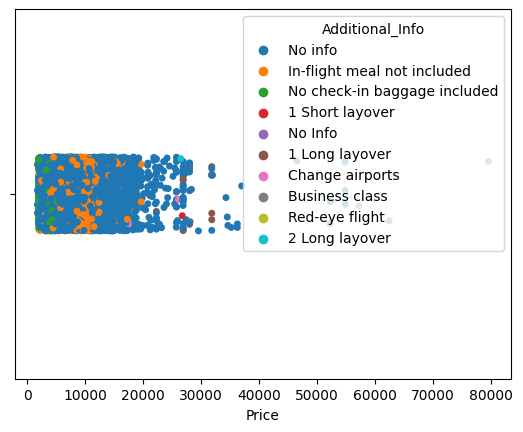

In [83]:
sns.stripplot(data=flight_df,x="Price",hue="Additional_Info")

In [84]:
flight_df=flight_df.drop("Additional_Info",axis=1)
flight_df.head()

,Airline,Price,Day,Month,Year,Duration_In_Minutes,Total_Stops_Count,Dep_time_range,Source_Destination
0,IndiGo,3897,24,3,2019,170,0,From 22 to 24,Banglore-New Delhi
1,Air India,7662,1,5,2019,445,2,From 4 to 6,Kolkata-Banglore
2,Jet Airways,13882,9,6,2019,1140,2,From 8 to 10,Delhi-Cochin
3,IndiGo,6218,12,5,2019,325,1,From 18 to 20,Kolkata-Banglore
4,IndiGo,13302,1,3,2019,285,1,From 16 to 18,Banglore-New Delhi


In [85]:
flight_df.shape

(10462, 9)

<Axes: xlabel='Duration_In_Minutes', ylabel='Price'>

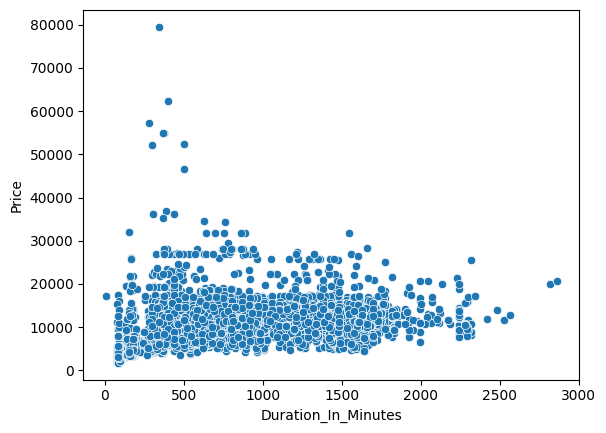

In [88]:
sns.scatterplot(data=flight_df,x="Duration_In_Minutes",y="Price")

<Axes: xlabel='Airline', ylabel='Price'>

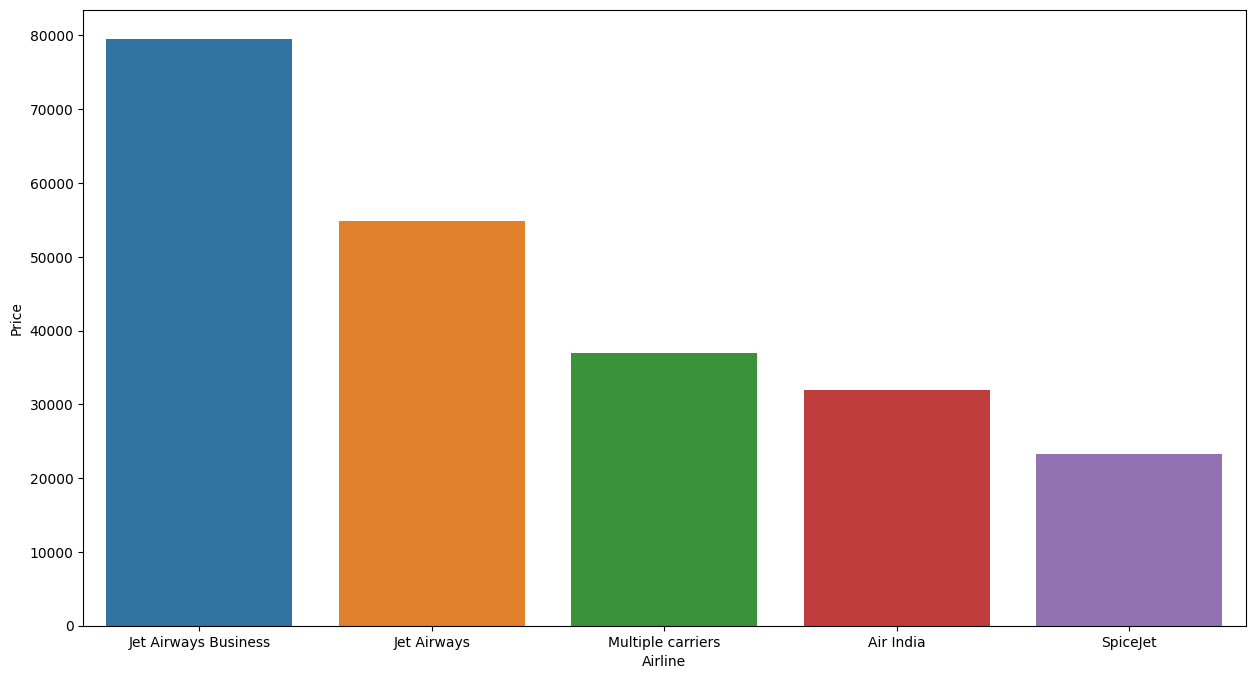

In [109]:
df_top_five_expensive_airline = flight_df.groupby("Airline")[["Airline","Price"]].max().sort_values(by="Price",ascending=False).head()
fig=plt.figure(figsize=(15,8))
sns.barplot(data=df_top_five_expensive_airline,x="Airline",y="Price")

In [137]:
df_top_five_expensive_departure_timing_by_indigo_kolkata_bangalore = flight_df[(flight_df["Airline"]=="IndiGo") & (flight_df["Total_Stops_Count"]==0) & (flight_df["Source_Destination"]=="Kolkata-Banglore")].groupby("Dep_time_range")[["Price"]].mean().sort_values(by="Price",ascending=False).head()

In [138]:
df_top_five_expensive_departure_timing_by_indigo_kolkata_bangalore

,Price
Dep_time_range,
From 10 to 12,4977.185185
From 14 to 16,4964.640449
From 16 to 18,4845.750000
From 8 to 10,4814.000000
From 22 to 24,4734.371429


<Axes: >

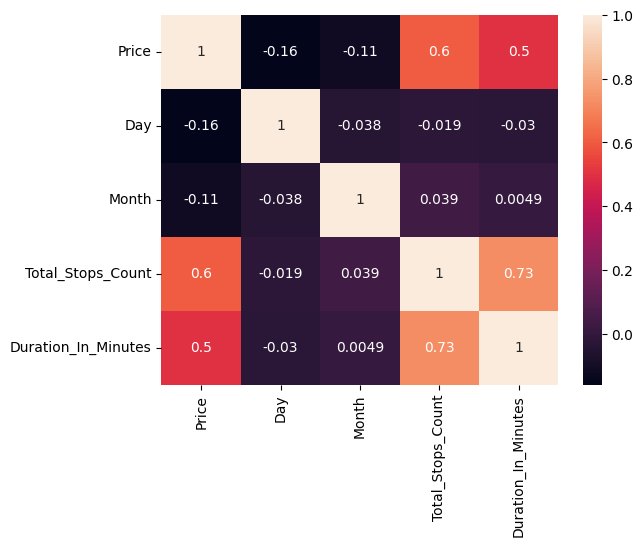

In [158]:
sns.heatmap(flight_df[["Price","Day","Month","Total_Stops_Count","Duration_In_Minutes"]].corr(),annot=True)

In [156]:
flight_df["Year"].value_counts()

Year
2019    10462
Name: count, dtype: int64

In [157]:
flight_df=flight_df.drop("Year",axis=1)
flight_df.head()

,Airline,Price,Day,Month,Duration_In_Minutes,Total_Stops_Count,Dep_time_range,Source_Destination
0,IndiGo,3897,24,3,170,0,From 22 to 24,Banglore-New Delhi
1,Air India,7662,1,5,445,2,From 4 to 6,Kolkata-Banglore
2,Jet Airways,13882,9,6,1140,2,From 8 to 10,Delhi-Cochin
3,IndiGo,6218,12,5,325,1,From 18 to 20,Kolkata-Banglore
4,IndiGo,13302,1,3,285,1,From 16 to 18,Banglore-New Delhi


In [159]:
flight_df["Month"].value_counts()

Month
5    3395
6    3311
3    2678
4    1078
Name: count, dtype: int64

In [161]:
flight_df.head()

,Airline,Price,Day,Month,Duration_In_Minutes,Total_Stops_Count,Dep_time_range,Source_Destination
0,IndiGo,3897,24,3,170,0,From 22 to 24,Banglore-New Delhi
1,Air India,7662,1,5,445,2,From 4 to 6,Kolkata-Banglore
2,Jet Airways,13882,9,6,1140,2,From 8 to 10,Delhi-Cochin
3,IndiGo,6218,12,5,325,1,From 18 to 20,Kolkata-Banglore
4,IndiGo,13302,1,3,285,1,From 16 to 18,Banglore-New Delhi


In [165]:
flight_df.to_excel("./data/clean_data.xlsx",index=False)